<a href="https://colab.research.google.com/github/Mjrovai/UNIFEI-IESTI01-TinyML-2022.1/blob/main/00_Curse_Folder/1_Fundamentals/Class_05/Exploring_Loss_Cost_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring_Loss

Import Libraries

In [1]:
import matplotlib.pyplot as plt

Define input data and target data

In [2]:
X = [-1, 0, 1, 2, 3, 4]
Y = [-3, -1, 1, 3, 5, 7]

In [3]:
type(X)

list

Plot data

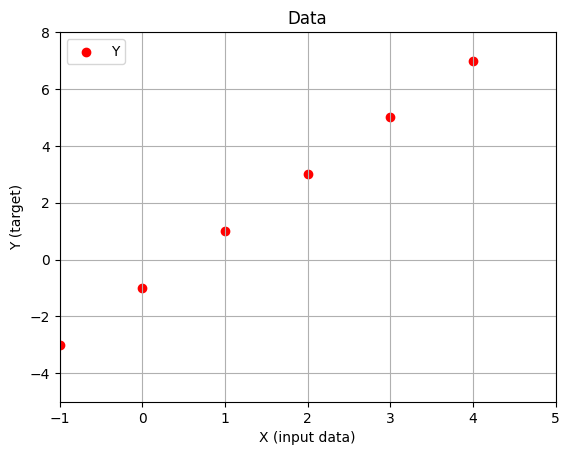

In [5]:
plt.scatter(X, Y, color='red', label='Y')
plt.axis([-1,5,-5,8])
plt.title('Data')
plt.xlabel('X (input data)')
plt.ylabel('Y (target)')
plt.legend(loc='upper left')
plt.grid()

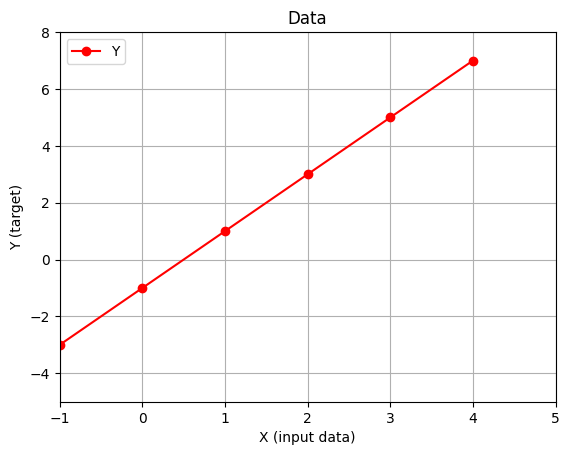

In [6]:
plt.plot(X, Y, color='red', marker='o', label='Y')
plt.axis([-1,5,-5,8])
plt.title('Data')
plt.xlabel('X (input data)')
plt.ylabel('Y (target)')
plt.legend(loc='upper left')
plt.grid()

Edit parameters (w and b) to try different loss measurements. 
- Rerun the cells when done
- Your Y will be calculated as: Y=w*X+b, 

Example: if w=3, and b=-1, then: Y=3x-1

In [7]:
w = 3
b = -1

Calculate and plot Y_hat 

In [8]:
Y_hat = [] 

for Xi in X:
  Yi = (w*Xi)+b
  Y_hat.append(Yi)
  print(Y_hat)
print("") 
print("Real Y is " + str(Y))
print("My Y is   " + str(Y_hat))

[-4]
[-4, -1]
[-4, -1, 2]
[-4, -1, 2, 5]
[-4, -1, 2, 5, 8]
[-4, -1, 2, 5, 8, 11]

Real Y is [-3, -1, 1, 3, 5, 7]
My Y is   [-4, -1, 2, 5, 8, 11]


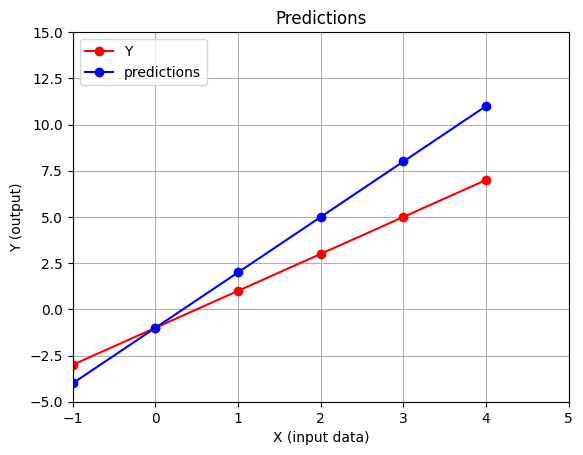

In [9]:
plt.plot(X, Y, color='red', marker='o', label='Y')
plt.plot(X, Y_hat, color='blue', marker='o', label='predictions')
plt.axis([-1,5,-5,15])
plt.title('Predictions')
plt.xlabel('X (input data)')
plt.ylabel('Y (output)')
plt.legend(loc='upper left')
plt.grid()

Let's calculate the loss

In [10]:
len(Y)

6

In [11]:
total_squared_error = 0
n = len(Y)
for i in range(0, n):
  squared_error = (Y[i] - Y_hat[i]) ** 2
  total_squared_error += squared_error
  print(total_squared_error)
print("")
print("My total loss is: {:.2f}".format(total_squared_error))

1
1
2
6
15
31

My total loss is: 31.00


Let's calculate the MSE (Mean Squared Error) that is typical in Regression problems 

In [12]:
print("My MSE loss is: {:.2f}".format((1/n)*(total_squared_error)))

My MSE loss is: 5.17


Criating a function

In [13]:
def calc_plot_error (X, Y, w, b):
    Y_hat = [] 
    for Xi in X:
        Yi = (w*Xi)+b
        Y_hat.append(Yi)

    total_squared_error = 0
    n = len(Y)
    for i in range(0, n):
        squared_error = (Y[i] - Y_hat[i]) ** 2
        total_squared_error += squared_error
    
    MSE = (1/n)*(total_squared_error)
    print("MSE is: {:.2f}".format(MSE))
    plt.plot(X, Y, color='red', marker='o', label='Y')
    plt.plot(X, Y_hat, color='blue', marker='o', label='predictions')
    plt.axis([-1,5,-5,15])
    plt.title('Predictions')
    plt.xlabel('X (input data)')
    plt.ylabel('Y (output)')
    #plt.legend(loc='upper left')
    plt.grid()

    return MSE

MSE is: 5.17


5.166666666666666

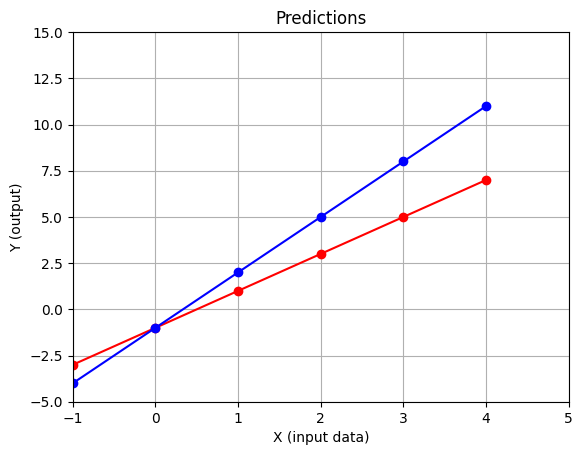

In [23]:
calc_plot_error (X, Y, w=3, b=-1) #  Initial guess

MSE is: 1.00


1.0

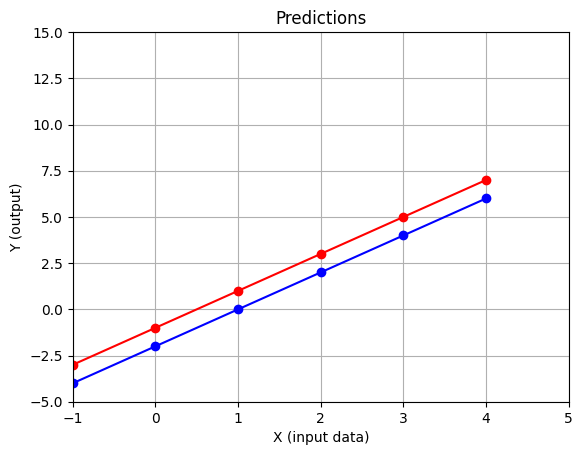

In [21]:
calc_plot_error (X, Y, w=2, b=-2) # Second guess

MSE is: 0.00


0.0

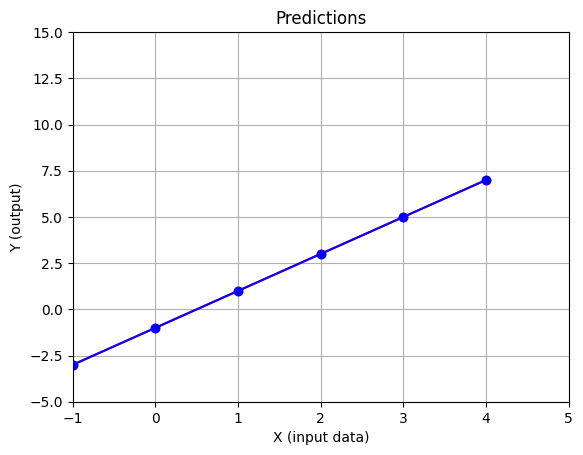

In [22]:
calc_plot_error (X, Y, w=2, b=-1)   # Best fit line MSE = 0

Let's fix the parameter b and study w

MSE is: 82.67
MSE is: 46.50
MSE is: 20.67
MSE is: 5.17
MSE is: 0.00
MSE is: 5.17
MSE is: 20.67
MSE is: 46.50
MSE is: 82.67


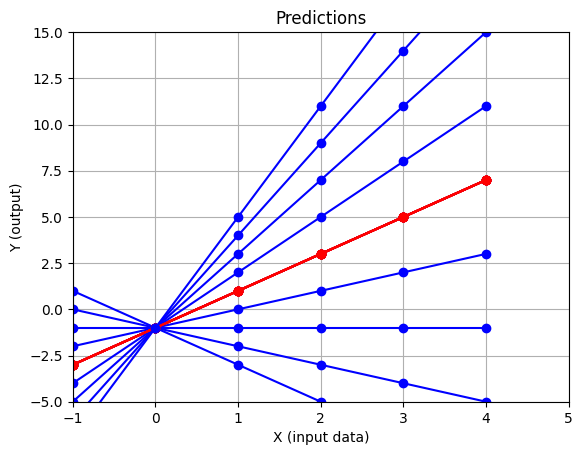

In [18]:
b = -1
W_lst = [-2, -1, 0, 1, 2, 3, 4, 5, 6]
MSE_lst = []
for wi in W_lst:
    MSEi = calc_plot_error (X, Y, w=wi, b=b)
    MSE_lst.append(MSEi)

In [24]:
MSE_lst

[82.66666666666666,
 46.5,
 20.666666666666664,
 5.166666666666666,
 0.0,
 5.166666666666666,
 20.666666666666664,
 46.5,
 82.66666666666666]

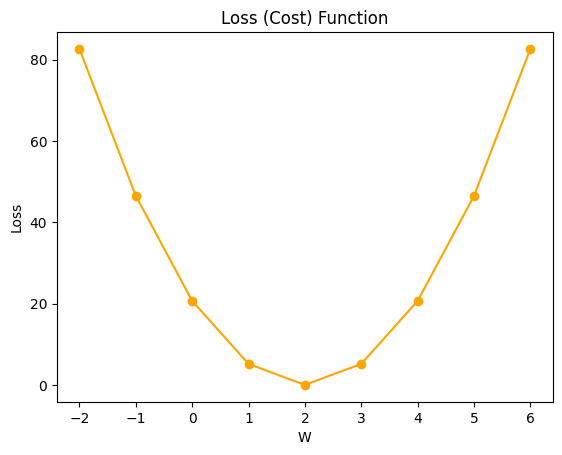

In [25]:
plt.plot(W_lst, MSE_lst, color='orange', marker='o', label='error')
plt.title('Loss (Cost) Function')
plt.xlabel('W')
plt.ylabel('Loss');